# Module 1: Data Collection
Collecting Data Using API
Collecting Data Using Web Scraping
Exploring Data

# Module 2: Data Wrangling
Finding Missing Values
Determining Missing Values
Finding Duplicates
Removing Duplicates
Normalizing Data

# Module 3: Exploratory Data Analysis
Distribution
Outliers
Correlation

# Module 4: Data Visualization
Visualizing Distribution of Data
Composition
Comparison

# Module 5: Dashboard Creation
Dashboards

# Module 6: Presentation of Findings
Final Presentationn of Findings



### Module 1

In [3]:
#Import required libraries
import pandas as pd
import json
import requests # you need this module to make an API call

In [3]:
# Write a function to get the number of jobs for the Python technology.
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json() 

def get_number_of_jobs_T(technology):
  # Initialize a counter
    number_of_jobs = 0

    # Loop through each job posting in the data
    for job in data:
        # Check if the technology is mentioned in the job's "Key Skills"
        if technology.lower() in job.get("Key Skills", "").lower():
            number_of_jobs += 1
    #your code goes here
    return technology,number_of_jobs


In [4]:
# Calling the function for Python and checking if it works.
get_number_of_jobs_T('Python')

('Python', 1173)

In [7]:
# Write a function to find number of jobs in US for a location of your choice
 
def get_number_of_jobs_L(location):
  # Initialize a counter
    number_of_jobs = 0

    # Loop through each job posting in the data
    for job in data:
        # Check if the technology is mentioned in the job's "Key Skills"
        if location.lower() in job.get("Location", "").lower():
            number_of_jobs += 1
    #your code goes here
    return location,number_of_jobs

In [9]:
# Call for the function and search for LA
get_number_of_jobs_L('Los Angeles')

('Los Angeles', 640)

### Webscraping

In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
data  = requests.get(url).text 

In [4]:
soup = BeautifulSoup(data,"html.parser")

In [7]:
# Find the table containing the data using its tag
table = soup.find('table')  # This assumes the table is the first <table> tag found

# Initialize lists to store the data
languages = []
Average_Annual_Salary = []

# Iterate through each row of the table (skip the header row)
for row in table.find_all('tr')[1:]:  # [1:] to skip the header row
    columns = row.find_all('td')
    if len(columns) >= 2:  # Check if there are enough columns in the row
        language = columns[1].text.strip()  # Get the language name
        salary = columns[3].text.strip()  # Get the salary
        languages.append(language)
        Average_Annual_Salary.append(salary)
        
print(Average_Annual_Salary)
print(languages)

['$114,383', '$101,013', '$92,037', '$110,981', '$130,801', '$113,865', '$88,726', '$84,727', '$84,793', '$94,082']
['Python', 'Java', 'R', 'Javascript', 'Swift', 'C++', 'C#', 'PHP', 'SQL', 'Go']


### Survey Dataset Exploration Lab

In [8]:
import pandas as pd
import requests


In [9]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [10]:
# Read the CSV data from the URL into a DataFrame
df = pd.read_csv(dataset_url)

In [11]:
# top 5 rows and columns from your dataset.
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [12]:
# Number of rows and columns
df.shape

(11552, 85)

In [13]:
# the mean age of the survey participants.
df["Age"].dtypes

dtype('float64')

In [14]:
# Print how many unique countries are there in the Country column
num_unique_countries = df['Country'].nunique()
num_unique_countries

135

### Data Wrangling

In [4]:
# Load the data into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

In [11]:
# Display the columns to understand which might logically have duplicates
df.columns.tolist()

['Respondent',
 'MainBranch',
 'Hobbyist',
 'OpenSourcer',
 'OpenSource',
 'Employment',
 'Country',
 'Student',
 'EdLevel',
 'UndergradMajor',
 'EduOther',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CareerSat',
 'JobSat',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'JobSeek',
 'LastHireDate',
 'LastInt',
 'FizzBuzz',
 'JobFactors',
 'ResumeUpdate',
 'CurrencySymbol',
 'CurrencyDesc',
 'CompTotal',
 'CompFreq',
 'ConvertedComp',
 'WorkWeekHrs',
 'WorkPlan',
 'WorkChallenge',
 'WorkRemote',
 'WorkLoc',
 'ImpSyn',
 'CodeRev',
 'CodeRevHrs',
 'UnitTests',
 'PurchaseHow',
 'PurchaseWhat',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'OpSys',
 'Containers',
 'BlockchainOrg',
 'BlockchainIs',
 'BetterLife',
 'ITperson',
 'OffOn',
 'SocialMedia',
 'Ext

In [13]:
# Check for duplicates in the 'Respondent' column
respondent_duplicates = df['Respondent'].duplicated().sum()
respondent_duplicates

154

In [9]:
# Check for duplicates in the entire dataframe
duplicates = df.duplicated()
# Display the boolean Series
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
11547    False
11548    False
11549    False
11550    False
11551    False
Length: 11552, dtype: bool


In [10]:
# Count the total number of duplicate rows
duplicate_count = duplicates.sum()

print(f"Total number of duplicate rows: {duplicate_count}")

Total number of duplicate rows: 154


In [27]:
# Display only the duplicate rows
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [Respondent, MainBranch, Hobbyist, OpenSourcer, OpenSource, Employment, Country, Student, EdLevel, UndergradMajor, EduOther, OrgSize, DevType, YearsCode, Age1stCode, YearsCodePro, CareerSat, JobSat, MgrIdiot, MgrMoney, MgrWant, JobSeek, LastHireDate, LastInt, FizzBuzz, JobFactors, ResumeUpdate, CurrencySymbol, CurrencyDesc, CompTotal, CompFreq, ConvertedComp, WorkWeekHrs, WorkPlan, WorkChallenge, WorkRemote, WorkLoc, ImpSyn, CodeRev, CodeRevHrs, UnitTests, PurchaseHow, PurchaseWhat, LanguageWorkedWith, LanguageDesireNextYear, DatabaseWorkedWith, DatabaseDesireNextYear, PlatformWorkedWith, PlatformDesireNextYear, WebFrameWorkedWith, WebFrameDesireNextYear, MiscTechWorkedWith, MiscTechDesireNextYear, DevEnviron, OpSys, Containers, BlockchainOrg, BlockchainIs, BetterLife, ITperson, OffOn, SocialMedia, Extraversion, ScreenName, SOVisit1st, SOVisitFreq, SOVisitTo, SOFindAnswer, SOTimeSaved, SOHowMuchTime, SOAccount, SOPartFreq, SOJobs, EntTeams, SOComm, WelcomeChang

In [16]:
# Remove duplicates based on the 'Respondent' column and keep the first occurrence
df = df.drop_duplicates(subset=['Respondent'], keep='first')
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11548,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11549,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11550,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less wel

In [26]:
# Count the total number of duplicate rows - to verify
duplicate_count = df['Respondent'].duplicated().sum()
duplicate_count

0

In [28]:
# Check for missing values in each column of the dataframe
missing_values = df.isnull().sum()

# Display the missing values for all columns
print(missing_values)


Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64


In [29]:
# Check for missing values in WorkLoc column of the dataframe
missing_values1 = df['WorkLoc'].isnull().sum()
missing_values1


In [30]:
# Find the value counts for the 'WorkLoc' column
workloc_counts = df['WorkLoc'].value_counts()

print(workloc_counts)

WorkLoc
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: count, dtype: int64


In [31]:
# Find the most frequent value in the 'WorkLoc' column
most_frequent_workloc = df['WorkLoc'].value_counts().idxmax()
most_frequent_workloc

'Office'

In [32]:
#Replace all missing values in 'WorkLoc' with the most frequent value using replace()
df['WorkLoc'] = df['WorkLoc'].replace(to_replace=pd.NA, value=most_frequent_workloc)
# Verify that there are no more missing values in 'WorkLoc'
print(df['WorkLoc'].isnull().sum())

0


In [33]:
# Normalizing data
# List out the various categories in the column 'CompFreq'
df['CompFreq'].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

In [38]:
# Create a new column named 'NormalizedAnnualCompensation'
# Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

# If the CompFreq is Yearly then use the exising value in CompTotal
# If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
# If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)
import numpy as np

df['NormalizedAnnualCompensation'] = np.where(df['CompFreq']=='Yearly', df['CompTotal'], 
                                               np.where(df['CompFreq']=='Monthly', df['CompTotal']*12, 
                                                        np.where(df['CompFreq']=='Weekly', df['CompTotal']*52,
                                                                np.nan)))
# Display the first few rows of the dataframe to verify the new column
print(df[['CompFreq', 'CompTotal', 'NormalizedAnnualCompensation']].head())

  CompFreq  CompTotal  NormalizedAnnualCompensation
0   Yearly    61000.0                       61000.0
1   Yearly   138000.0                      138000.0
2   Yearly    90000.0                       90000.0
3  Monthly    29000.0                      348000.0
4   Yearly    90000.0                       90000.0


In [ ]:
# or can be done by using the below method too
# Initialize the new column with NaN
df['NormalizedAnnualCompensation'] = np.nan

# Assign values based on conditions
df.loc[df['CompFreq'] == 'Yearly', 'NormalizedAnnualCompensation'] = df['CompTotal']
df.loc[df['CompFreq'] == 'Monthly', 'NormalizedAnnualCompensation'] = df['CompTotal'] * 12
df.loc[df['CompFreq'] == 'Weekly', 'NormalizedAnnualCompensation'] = df['CompTotal'] * 52

# Display the first few rows of the dataframe to verify the new column
print(df[['CompFreq', 'CompTotal', 'NormalizedAnnualCompensation']].head())

In [51]:
num_yearly_paid_respondents = df['CompFreq'].value_counts().get('Yearly', 0)
num_yearly_paid_respondents

6073

In [52]:
df['NormalizedAnnualCompensation'].median()

100000.0

### Exploratory Data Analysis

In [71]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

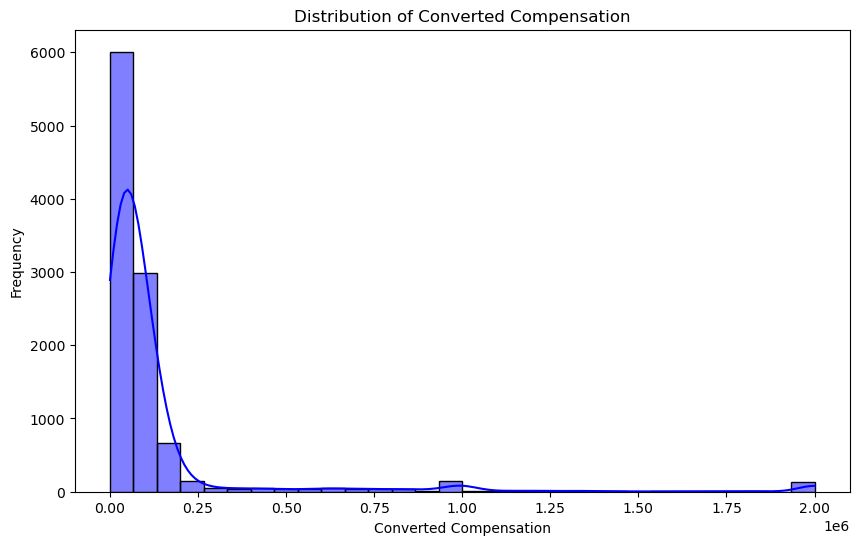

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution curve for 'ConvertedComp' using seaborn
sns.histplot(df['ConvertedComp'], kde=True, bins=30, color='blue')

# Add titles and labels
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [56]:
# Filter the DataFrame for respondents who identified themselves only as "Man"
men_only_df = df[df['Gender'] == 'Man']

# Count the number of respondents identified as "Man"
num_men_respondents = men_only_df.shape[0]
num_men_respondents

10480

In [57]:
# Calculate the five-number summary for the 'Age' column
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Display the five-number summary
print(f"Five-number summary for 'Age':")
print(f"Min: {min_age}")
print(f"Q1: {q1_age}")
print(f"Median: {median_age}")
print(f"Q3: {q3_age}")
print(f"Max: {max_age}")

Five-number summary for 'Age':
Min: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Max: 99.0


In [65]:
# What is the median of the column `ConvertedComp`?
df['ConvertedComp'].median()

57745.0

In [66]:
# How many responders identified themselves only as a Man?
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [76]:
# your code goes here
women_only_df = df[df['Gender'] == 'Woman']

# Calculate the median of the 'ConvertedComp' column for these respondents
median_converted_comp_women = women_only_df['ConvertedComp'].median()
median_converted_comp_women

57708.0

In [77]:
# Calculate the five-number summary for the 'Age' column
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Display the five-number summary
print(f"Five-number summary for 'Age':")
print(f"Min: {min_age}")
print(f"Q1: {q1_age}")
print(f"Median: {median_age}")
print(f"Q3: {q3_age}")
print(f"Max: {max_age}")

Five-number summary for 'Age':
Min: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Max: 99.0


In [78]:
# Outliers: IQR and Finding Outliers and 
# Drop missing values from the 'ConvertedComp' column
converted_comp_clean = df['ConvertedComp'].dropna()

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = converted_comp_clean.quantile(0.25)
Q3 = converted_comp_clean.quantile(0.75)

# Calculate the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = converted_comp_clean[(converted_comp_clean < lower_bound) | (converted_comp_clean > upper_bound)]

# Count the number of outliers
num_outliers = outliers.count()

# Display the number of outliers
print(f"Number of outliers in 'ConvertedComp': {num_outliers}")


Number of outliers in 'ConvertedComp': 879


In [ ]:
# Create a new dataframe by removing the outliers from the ConvertedComp column.

In [79]:
df_without_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"Number of rows after removing outliers: {df_without_outliers.shape[0]}")
df_without_outliers.head()

Number of rows after removing outliers: 9703


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


In [ ]:
# Correlation

In [80]:
# Select only numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for these numerical columns
correlation_matrix = numerical_columns.corr()

# Extract the correlation of 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age']

# Display the correlation values
print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


### Data Visualisation

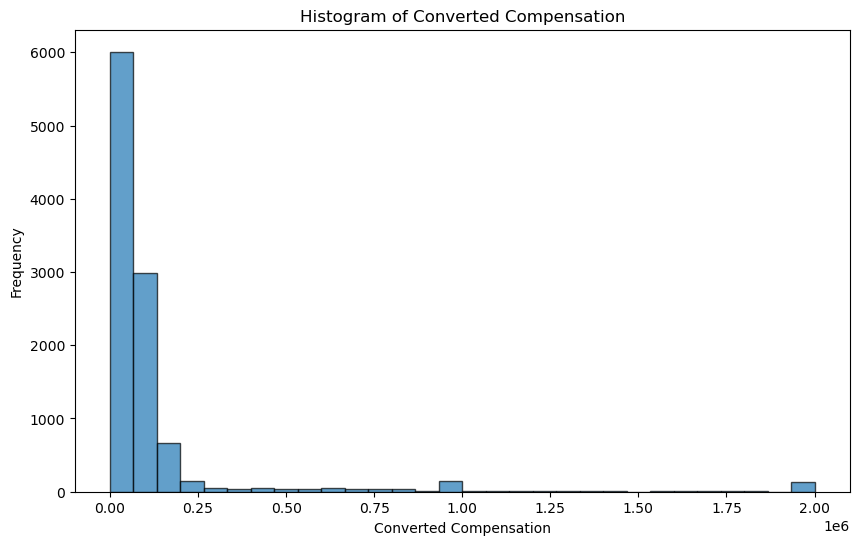

In [85]:
import matplotlib.pyplot as plt

# Drop missing values from 'ConvertedComp' to avoid errors in plotting
converted_comp_clean = df['ConvertedComp'].dropna()

# Plot the histogram for 'ConvertedComp'
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.hist(converted_comp_clean, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Show the plot
plt.show()

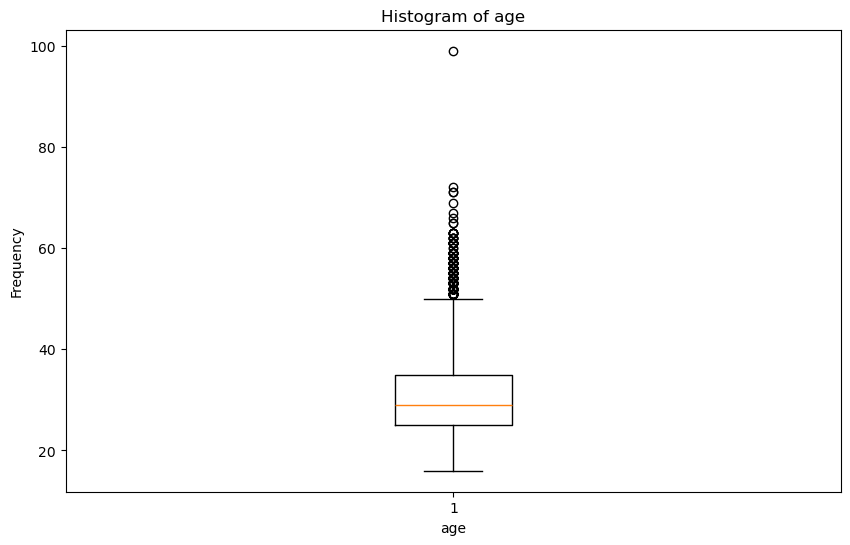

In [89]:
import matplotlib.pyplot as plt

# Drop missing values from 'ConvertedComp' to avoid errors in plotting
age_clean = df['Age'].dropna()

# Plot the histogram for 'ConvertedComp'
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.boxplot(age_clean)
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


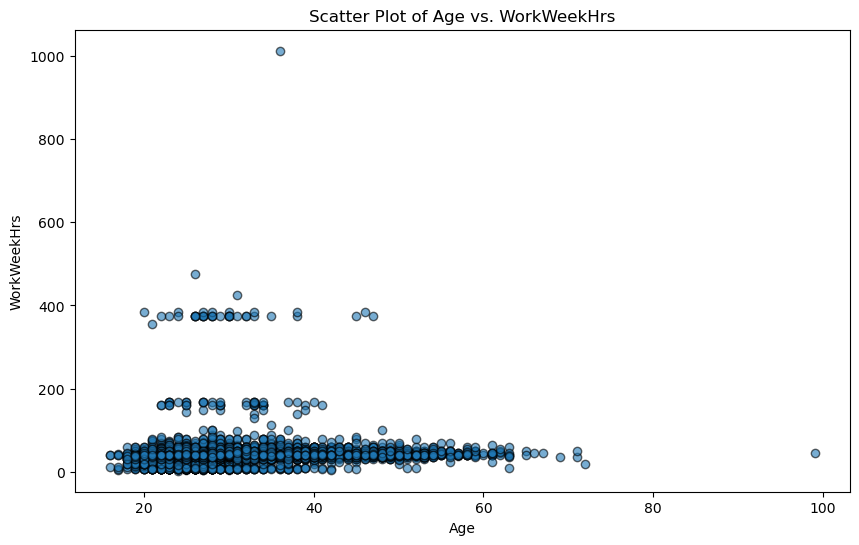

In [90]:
# Create a scatter plot of Age and WorkWeekHrs.
import matplotlib.pyplot as plt

# Drop missing values from 'Age' and 'WorkWeekHrs' to avoid errors in plotting
age_workweek_clean = df[['Age', 'WorkWeekHrs']].dropna()

# Plot the scatter plot for 'Age' and 'WorkWeekHrs'
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(age_workweek_clean['Age'], age_workweek_clean['WorkWeekHrs'], alpha=0.6, edgecolor='k')
plt.title('Scatter Plot of Age vs. WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

# Show the plot
plt.show()

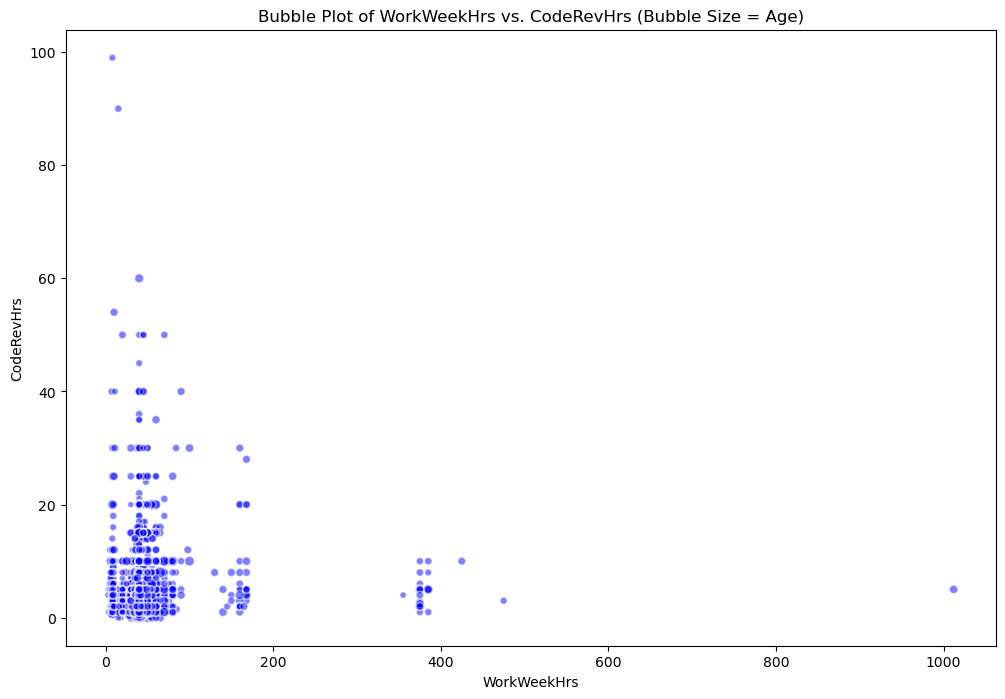

In [91]:
# your code goes here

import matplotlib.pyplot as plt

# Drop missing values from 'WorkWeekHrs', 'CodeRevHrs', and 'Age' to avoid errors in plotting
bubble_data = df[['WorkWeekHrs', 'CodeRevHrs', 'Age']].dropna()

# Normalize Age for bubble size (optional: adjust the multiplier for better visualization)
bubble_size = bubble_data['Age'] / bubble_data['Age'].max() * 100

# Plot the bubble plot
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
plt.scatter(bubble_data['WorkWeekHrs'], bubble_data['CodeRevHrs'], s=bubble_size, alpha=0.5, edgecolor='w', c='blue')
plt.title('Bubble Plot of WorkWeekHrs vs. CodeRevHrs (Bubble Size = Age)')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

# Show the plot
plt.show()


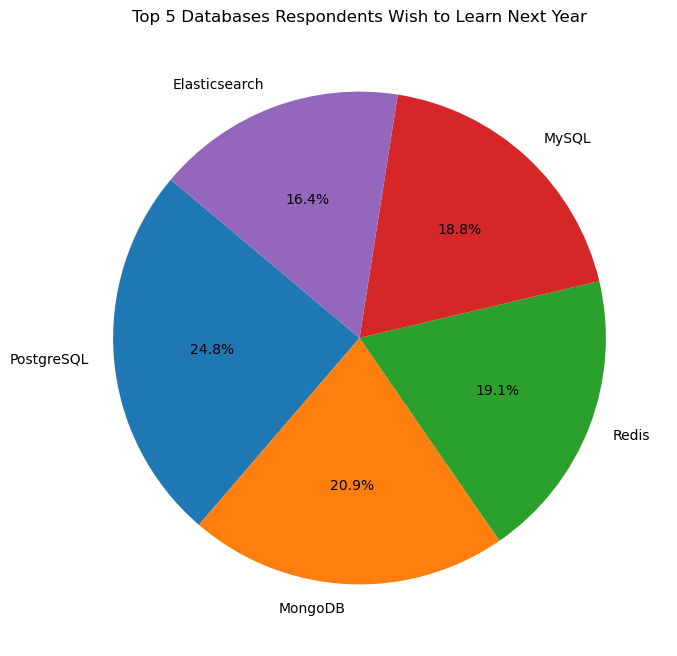

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'DatabaseDesireNextYear' column contains the databases respondents wish to learn next year, separated by ';'
# Drop missing values from 'DatabaseDesireNextYear'
database_next_year_clean = df['DatabaseDesireNextYear'].dropna()

# Split the values by ';' and explode into individual rows
database_expanded = database_next_year_clean.str.split(';', expand=True).stack()

# Count the occurrences of each database
database_counts = database_expanded.value_counts()

# Select the top 5 databases
top_5_databases = database_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

# Display the plot
plt.show()


In [96]:
import pandas as pd

# Assuming 'LanguageDesireNextYear' column contains the languages respondents wish to learn next year, separated by ';'
# Drop missing values from 'LanguageDesireNextYear'
language_next_year_clean = df['LanguageDesireNextYear'].dropna()

# Split the values by ';' and explode into individual rows
language_expanded = language_next_year_clean.str.split(';', expand=True).stack()

# Count the occurrences of each language
language_counts = language_expanded.value_counts()

# Get the rank of Python
python_rank = language_counts.rank(ascending=False).get('Python', 'Python not found')

# Display the rank of Python
print(f"Rank of Python among the languages respondents wish to learn next year: {python_rank}")

Rank of Python among the languages respondents wish to learn next year: 3.0


In [109]:
# How many respondents indicated that they currently work with 'SQL'? 
# Drop missing values from 'LanguageWorkedWith'
languages_worked_with_clean = df['LanguageWorkedWith'].dropna()

# Filter rows where 'SQL' is mentioned
sql_respondents = languages_worked_with_clean[languages_worked_with_clean.str.contains('SQL', na=False)]

# Count the number of respondents who work with 'SQL'
num_sql_respondents = sql_respondents.count()

# Display the count
print(f"Number of respondents who currently work with 'SQL': {num_sql_respondents}")


Number of respondents who currently work with 'SQL': 7106


In [108]:
# How many respondents indicated that they work on 'MySQL' only? 
# Drop missing values from 'DatabaseWorkedWith'
df_clean = df.dropna(subset=['DatabaseWorkedWith'])

# Filter respondents who work with 'MySQL' only
mysql_only = df_clean[df_clean['DatabaseWorkedWith'] == 'MySQL']

# Count the number of respondents who work on 'MySQL' only
num_mysql_only_respondents = mysql_only.shape[0]

# Display the result
print(f"Number of respondents who work on 'MySQL' only: {num_mysql_only_respondents}")


Number of respondents who work on 'MySQL' only: 474


In [116]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less wel

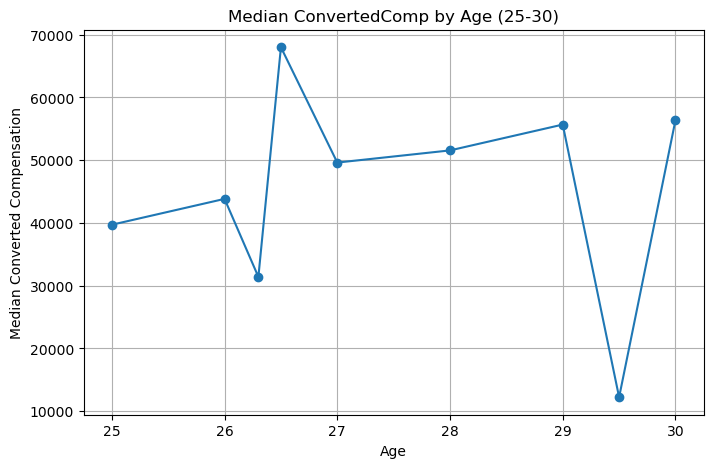

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the age group 25-30
age_group_df = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

# Calculate the median ConvertedComp for each age within this group
median_converted_comp_by_age = age_group_df.groupby('Age')['ConvertedComp'].median()

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(median_converted_comp_by_age.index, median_converted_comp_by_age.values, marker='o', linestyle='-')
plt.title('Median ConvertedComp by Age (25-30)')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)

# Display the plot
plt.show()
